#**Análisis de ingresantes por Modalidad Ordinaria a la UNI**

In [7]:
# Instalar librerias no incluídas por defecto
!pip install unidecode
# Cargar las librerías principales
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from unidecode import unidecode

# Montar Google Drive
drive.mount('/content/drive')

# Cambiar al directorio donde está el archivo (Nótese que debe ser creado en el directorio definido y puede variar por cada usuario)
# Es importante tener en cuenta que el archivo .csv debe estar cargado en el directorio
os.chdir('/content/drive/MyDrive/Colab Notebooks/Concurso - Exprésate con Datos/')

# Verificar el directorio actual
current_directory = os.getcwd()
print("Directorio actual:", current_directory)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.8 MB/s eta 0:00:00
Mounted at /content/drive
Directorio actual: /content/drive/MyDrive/Colab Notebooks/Concurso - Exprésate con Datos


# ETAPA 1: Limpieza de los datos obtenidos

In [8]:
# Cargamos un archivo excel
df = pd.read_excel("Dataframe con coordenadas reales.xlsx")
df.head()

,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,ESPECIALIDAD,ANIO_POSTULA,DOMICILIO_DEPA,DOMICILIO_PROV,DOMICILIO_DIST,NACIMIENTO_PAIS,...,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,LONGITUD_DOMICILIO,LATITUD_DOMICILIO,DISTANCIA_KM,DISTANCIA_KM_REAL
0,ANCASH,HUARAZ,HUARAZ,PERU,INGENIERIA DE TELECOMUNICACIONES,2021,ANCASH,HUARAZ,HUARAZ,PERU,...,FEMENINO,3.58,0,1,23,7,-77.528779,-9.526115,282.734843,401.300
1,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,INGENIERIA MECANICA,2021,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,...,MASCULINO,8.04,0,1,24,8,-77.004264,-11.968180,7.875373,12.397
2,LIMA,LIMA,SAN MARTIN DE PORRES,PERU,ARQUITECTURA,2021,LIMA,LIMA,INDEPENDENCIA,PERU,...,FEMENINO,6.21,0,1,20,4,-77.055057,-11.997708,3.083460,3.938
3,LIMA,LIMA,VILLA EL SALVADOR,PERU,INGENIERIA CIVIL,2021,LIMA,LIMA,LIMA,PERU,...,MASCULINO,4.45,0,1,22,5,-77.043089,-12.046689,2.517110,2.752
4,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,INGENIERIA AMBIENTAL,2021,LIMA,LIMA,LIMA,PERU,...,FEMENINO,5.97,0,1,25,9,-77.043089,-12.046689,2.517110,2.752


In [9]:
#Vamos a reemplazar los valores vacios en DISTANCIA_KM_REAL por su respectivo valor en DISTANCIA_KM
df['DISTANCIA_KM_REAL'] = df['DISTANCIA_KM_REAL'].fillna(df['DISTANCIA_KM'])

In [10]:
df.head()

,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,ESPECIALIDAD,ANIO_POSTULA,DOMICILIO_DEPA,DOMICILIO_PROV,DOMICILIO_DIST,NACIMIENTO_PAIS,...,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,LONGITUD_DOMICILIO,LATITUD_DOMICILIO,DISTANCIA_KM,DISTANCIA_KM_REAL
0,ANCASH,HUARAZ,HUARAZ,PERU,INGENIERIA DE TELECOMUNICACIONES,2021,ANCASH,HUARAZ,HUARAZ,PERU,...,FEMENINO,3.58,0,1,23,7,-77.528779,-9.526115,282.734843,401.300
1,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,INGENIERIA MECANICA,2021,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,...,MASCULINO,8.04,0,1,24,8,-77.004264,-11.968180,7.875373,12.397
2,LIMA,LIMA,SAN MARTIN DE PORRES,PERU,ARQUITECTURA,2021,LIMA,LIMA,INDEPENDENCIA,PERU,...,FEMENINO,6.21,0,1,20,4,-77.055057,-11.997708,3.083460,3.938
3,LIMA,LIMA,VILLA EL SALVADOR,PERU,INGENIERIA CIVIL,2021,LIMA,LIMA,LIMA,PERU,...,MASCULINO,4.45,0,1,22,5,-77.043089,-12.046689,2.517110,2.752
4,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,INGENIERIA AMBIENTAL,2021,LIMA,LIMA,LIMA,PERU,...,FEMENINO,5.97,0,1,25,9,-77.043089,-12.046689,2.517110,2.752


In [11]:
df.DOMICILIO_DEPA.unique()

array(['ANCASH', 'LIMA', 'AYACUCHO', 'JUNIN', 'CAJAMARCA', 'HUANUCO',
       'CALLAO', 'HUANCAVELICA', 'ICA', 'APURIMAC', 'LA LIBERTAD', 'PUNO',
       'PIURA', 'PASCO', 'AREQUIPA', 'CUSCO', 'LAMBAYEQUE', 'UCAYALI',
       'MADRE DE DIOS', 'AMAZONAS', 'SAN MARTIN', 'TACNA', 'TUMBES',
       'MOQUEGUA', 'LORETO'], dtype=object)

In [15]:
#Vamos a definir por macroregiones a fin de reducir un poco la complejidad
macroregiones = {
    # Macroregión Norte
    'TUMBES': 'NORTE',
    'PIURA': 'NORTE',
    'LAMBAYEQUE': 'NORTE',
    'CAJAMARCA': 'NORTE',
    'LA LIBERTAD': 'NORTE',

    # Macroregión Centro

    'ANCASH': 'CENTRO',
    'JUNIN': 'CENTRO',
    'PASCO': 'CENTRO',
    'HUANUCO': 'CENTRO',
    'HUANCAVELICA': 'CENTRO',
    'AYACUCHO': 'CENTRO',
    'ICA': 'CENTRO',

    # Macroregión Sur
    'AREQUIPA': 'SUR',
    'MOQUEGUA': 'SUR',
    'TACNA': 'SUR',
    'CUSCO': 'SUR',
    'MADRE DE DIOS': 'SUR',
    'APURIMAC': 'SUR',
    'PUNO': 'SUR',

    # Macroregión Oriente
    'LORETO': 'ORIENTE',
    'UCAYALI': 'ORIENTE',
    'AMAZONAS': 'ORIENTE',
    'SAN MARTIN': 'ORIENTE',

    # Lima Metropolitana
    'CALLAO': 'LIMA',
    'LIMA': 'LIMA'  # Asegúrate de que este nombre coincida con cómo se presenta en tu DataFrame
}

# Mapear la columna de departamentos a macroregiones
df['DOMICILIO_MACROREGION'] = df['DOMICILIO_DEPA'].map(macroregiones)

In [16]:
df.DOMICILIO_MACROREGION.unique()

array(['CENTRO', 'LIMA', 'NORTE', 'SUR', 'ORIENTE'], dtype=object)

In [44]:
#Contar las filas con groupby en funcion a la columna MACROREGION
df.groupby('MACROREGION').size()

,0
MACROREGION,
Centro,1768
Lima,21164
Norte,406
Oriente,160
Sur,551


In [17]:
#Mostraremos los titulos de las columnas del dataframe df
df.columns

Index(['COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'COLEGIO_PAIS',
       'ESPECIALIDAD', 'ANIO_POSTULA', 'DOMICILIO_DEPA', 'DOMICILIO_PROV',
       'DOMICILIO_DIST', 'NACIMIENTO_PAIS', 'NACIMIENTO_DEPA',
       'NACIMIENTO_PROV', 'NACIMIENTO_DIST', 'SEXO', 'CALIF_FINAL', 'INGRESO',
       'N° INTENTO', 'EDAD', 'ANIOS_DE_EGRESO_COLEGIO', 'LONGITUD_DOMICILIO',
       'LATITUD_DOMICILIO', 'DISTANCIA_KM', 'DISTANCIA_KM_REAL',
       'DOMICILIO_MACROREGION'],
      dtype='object')

In [18]:
colegios = {
    # Macroregión Norte
    'TUMBES': 'TUMBES',
    'PIURA': 'PIURA',
    'LAMBAYEQUE': 'LAMBAYEQUE',
    'CAJAMARCA': 'CAJAMARCA',
    'LA LIBERTAD': 'LA LIBERTAD',

    # Macroregión Centro

    'ANCASH': 'ANCASH',
    'JUNIN': 'JUNIN',
    'PASCO': 'PASCO',
    'HUANUCO': 'HUANUCO',
    'HUANCAVELICA': 'HUANCAVELICA',
    'AYACUCHO': 'AYACUCHO',
    'ICA': 'ICA',

    # Macroregión Sur
    'AREQUIPA': 'AREQUIPA',
    'MOQUEGUA': 'MOQUEGUA',
    'TACNA': 'TACNA',
    'CUSCO': 'CUSCO',
    'MADRE DE DIOS': 'MADRE DE DIOS',
    'APURIMAC': 'APURIMAC',
    'PUNO': 'PUNO',

    # Macroregión Oriente
    'LORETO': 'LORETO',
    'UCAYALI': 'UCAYALI',
    'AMAZONAS': 'AMAZONAS',
    'SAN MARTIN': 'SAN MARTIN',

    # Lima Metropolitana
    'CALLAO': 'CALLAO',
    'LIMA': 'LIMA'  # Asegúrate de que este nombre coincida con cómo se presenta en tu DataFrame
}

# Mapear la columna de departamentos a macroregiones
df['COLEGIO_UBICACION'] = df['COLEGIO_DEPA'].map(colegios)

In [19]:
#Agrego una columna con el departamento de origen del colegio. En caso de ser colegio extranjero coloco EXTRANJERO
df['COLEGIO_UBICACION'].fillna('EXTRANJERO', inplace=True)

In [20]:
##Evaluación de las variables que no se considerarán dentro del modelo

#Se omite información respecto a los colegios por la alta variabilidad
#Asimismo, en el análisis gráfico se pudo evidenciar que casi todos los registros provienen de Perú
#COLEGIO_DEPA
#COLEGIO_PROV
#COLEGIO_DIST
#COLEGIO PAIS

#Se omite información del lugar del domicilio por la alta variabilidad
#Sin embargo, se ha reducido el impacto del mismo con 2 nuevas variables: DISTANCIA_KM_REAL y MACROREGION
#DOMICILIO_DEPA
#DOMICILIO_PROV
#DOMICILIO_DIST

#Se omite información del lugar de nacimiento para el modelo por la alta variabilidad
#Sin embargo, esta información puede ser impactante en una visualización geográfica
#NACIMIENTO_PAIS
#NACIMIENTO_DEPA
#NACIMIENTO_PROV
#NACIMIENTO_DIST

#La longitud y latitud se utilizaron para crear la variable DISTANCIA_KM y DISTANCIA_KM_REAL
#Pero DISTANCIA_KM no es preciso por lo que tambien se eliminó, y se optó por una distancia real con una API de gmaps (DISTANCIA_KM_REAL)
#LONGITUD_DOMICILIO
#LATITUD_DOMICILIO
#DISTANCIA_KM

#Se omite información por alta variabilidad
#ESPECIALIDAD
#ANIO_POSTULA

In [22]:
#Crear un nuevo dataframe sin las variables antes descritas.
df_modelo = df.drop(columns=['COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'COLEGIO_PAIS',
                             'DOMICILIO_DEPA', 'DOMICILIO_PROV', 'DOMICILIO_DIST',
                             'NACIMIENTO_PAIS', 'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST',
                             'LONGITUD_DOMICILIO', 'LATITUD_DOMICILIO', 'DISTANCIA_KM', 'ESPECIALIDAD',
                             'ANIO_POSTULA'])

In [50]:
df_modelo.head()

,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,COLEGIO_UBICACION,DOMICILIO_MACROREGION
0,FEMENINO,3.58,0,1,23,7,401.300,ANCASH,CENTRO
1,MASCULINO,8.04,0,1,24,8,12.397,LIMA,LIMA
2,FEMENINO,6.21,0,1,20,4,3.938,LIMA,LIMA
3,MASCULINO,4.45,0,1,22,5,2.752,LIMA,LIMA
4,FEMENINO,5.97,0,1,25,9,2.752,LIMA,LIMA


In [23]:
#Vamos a reemplazar la columna INGRESO, donde 0 será NO y 1 será SI
df_modelo['INGRESO'] = df_modelo['INGRESO'].replace({0: 'NO', 1: 'SI'})
df_modelo.head()

,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,DOMICILIO_MACROREGION,COLEGIO_UBICACION
0,FEMENINO,3.58,NO,1,23,7,401.300,CENTRO,ANCASH
1,MASCULINO,8.04,NO,1,24,8,12.397,LIMA,LIMA
2,FEMENINO,6.21,NO,1,20,4,3.938,LIMA,LIMA
3,MASCULINO,4.45,NO,1,22,5,2.752,LIMA,LIMA
4,FEMENINO,5.97,NO,1,25,9,2.752,LIMA,LIMA


#INGRESO DE DATOS

In [24]:
#Ver las dimensiones del dataframe
df_modelo.shape

(24049, 9)

In [25]:
#Verificamos un resumen del dataframe
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEXO                     24049 non-null  object 
 1   CALIF_FINAL              24049 non-null  float64
 2   INGRESO                  24049 non-null  object 
 3   N° INTENTO               24049 non-null  int64  
 4   EDAD                     24049 non-null  int64  
 5   ANIOS_DE_EGRESO_COLEGIO  24049 non-null  int64  
 6   DISTANCIA_KM_REAL        24049 non-null  float64
 7   DOMICILIO_MACROREGION    24049 non-null  object 
 8   COLEGIO_UBICACION        24049 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.7+ MB


##Análisis de las variables categóricas

In [26]:
#Buscaremos las variables categoricas
categorica = [var for var in df_modelo.columns if df_modelo[var].dtype=='object']

print('Hay {} variables categóricas\n'.format(len(categorica)))

print('Las variables categóricas son :', categorica)

Hay 4 variables categóricas

Las variables categóricas son : ['SEXO', 'INGRESO', 'DOMICILIO_MACROREGION', 'COLEGIO_UBICACION']


In [27]:
#Revisaremos los valores perdidos de las variables categoricas
df[categorica].isnull().sum()

,0
SEXO,0
INGRESO,0
DOMICILIO_MACROREGION,0
COLEGIO_UBICACION,0


In [28]:
#Mostrar las frecuencias de las variables categoricas
for var in categorica:
    print(df_modelo[var].value_counts())

SEXO
MASCULINO    18765
FEMENINO      5284
Name: count, dtype: int64
INGRESO
NO    20888
SI     3161
Name: count, dtype: int64
DOMICILIO_MACROREGION
LIMA       21164
CENTRO      1768
SUR          551
NORTE        406
ORIENTE      160
Name: count, dtype: int64
COLEGIO_UBICACION
LIMA             18712
CALLAO            1119
JUNIN              669
ANCASH             569
ICA                358
AYACUCHO           305
PUNO               251
LAMBAYEQUE         244
APURIMAC           223
CAJAMARCA          218
HUANUCO            213
HUANCAVELICA       155
CUSCO              140
AMAZONAS           132
SAN MARTIN         123
PASCO              118
AREQUIPA           103
LA LIBERTAD        101
PIURA               63
TACNA               62
UCAYALI             58
LORETO              39
MADRE DE DIOS       29
MOQUEGUA            21
TUMBES              18
EXTRANJERO           6
Name: count, dtype: int64


In [29]:
#Mostrar la frecuencia de las variables categóricas
for var in categorica:
    print(df_modelo[var].value_counts()/float(len(df_modelo)))

SEXO
MASCULINO    0.780282
FEMENINO     0.219718
Name: count, dtype: float64
INGRESO
NO    0.86856
SI    0.13144
Name: count, dtype: float64
DOMICILIO_MACROREGION
LIMA       0.880037
CENTRO     0.073517
SUR        0.022912
NORTE      0.016882
ORIENTE    0.006653
Name: count, dtype: float64
COLEGIO_UBICACION
LIMA             0.778078
CALLAO           0.046530
JUNIN            0.027818
ANCASH           0.023660
ICA              0.014886
AYACUCHO         0.012682
PUNO             0.010437
LAMBAYEQUE       0.010146
APURIMAC         0.009273
CAJAMARCA        0.009065
HUANUCO          0.008857
HUANCAVELICA     0.006445
CUSCO            0.005821
AMAZONAS         0.005489
SAN MARTIN       0.005115
PASCO            0.004907
AREQUIPA         0.004283
LA LIBERTAD      0.004200
PIURA            0.002620
TACNA            0.002578
UCAYALI          0.002412
LORETO           0.001622
MADRE DE DIOS    0.001206
MOQUEGUA         0.000873
TUMBES           0.000748
EXTRANJERO       0.000249
Name: count, dt

In [30]:
#Comprobar la cardinalidad de las variables categóricas (Cantidad de opciones)
#Una cardinalidad muy alta perjudica a la complejidad
for var in categorica:
    print(var, ' contains ', len(df_modelo[var].unique()), ' labels')

SEXO  contains  2  labels
INGRESO  contains  2  labels
DOMICILIO_MACROREGION  contains  5  labels
COLEGIO_UBICACION  contains  26  labels


In [31]:
#Exploramos la variable SEXO. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.SEXO, drop_first=True, dummy_na=True).head()

,MASCULINO,NaN
0,False,False
1,True,False
2,False,False
3,True,False
4,False,False


In [32]:
#Exploramos la variable MACROREGION. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.DOMICILIO_MACROREGION, drop_first=True, dummy_na=True).head()

,LIMA,NORTE,ORIENTE,SUR,NaN
0,False,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [33]:
#Exploramos la variable INGRESO. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.INGRESO, drop_first=True, dummy_na=True).head()

,SI,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [34]:
#Exploramos la variable INGRESO. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.COLEGIO_UBICACION, drop_first=True, dummy_na=True).head()

,ANCASH,APURIMAC,AREQUIPA,AYACUCHO,CAJAMARCA,CALLAO,CUSCO,EXTRANJERO,HUANCAVELICA,HUANUCO,...,MADRE DE DIOS,MOQUEGUA,PASCO,PIURA,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,NaN
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##Análisis de las variables numéricas

In [35]:
#Detectemos cuales son las variables numéricas

numerico = [var for var in df_modelo.columns if df_modelo[var].dtype!='object']
print('Hay {} variables numéricas\n'.format(len(numerico)))
print('Las variables numéricas son :', numerico)

Hay 5 variables numéricas

Las variables numéricas son : ['CALIF_FINAL', 'N° INTENTO', 'EDAD', 'ANIOS_DE_EGRESO_COLEGIO', 'DISTANCIA_KM_REAL']


In [36]:
#Visualizar solo las variables numéricas
df_modelo[numerico].head()

,CALIF_FINAL,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL
0,3.58,1,23,7,401.300
1,8.04,1,24,8,12.397
2,6.21,1,20,4,3.938
3,4.45,1,22,5,2.752
4,5.97,1,25,9,2.752


In [37]:
#Revisamos los valores nulos del dataframe
df_modelo[numerico].isnull().sum()

,0
CALIF_FINAL,0
N° INTENTO,0
EDAD,0
ANIOS_DE_EGRESO_COLEGIO,0
DISTANCIA_KM_REAL,0


In [38]:
#Revisamos un resumen estadístico de las variables numéricas
round(df_modelo[numerico].describe(),2)
#Nótese que se encuentran variables con posibles outliers

,CALIF_FINAL,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL
count,24049.00,24049.00,24049.00,24049.00,24049.00
mean,7.38,1.47,20.71,4.36,89.35
std,3.44,0.81,2.56,2.55,228.47
min,0.00,1.00,16.00,-1.00,2.29
25%,4.71,1.00,19.00,3.00,11.46
50%,7.00,1.00,20.00,4.00,17.86
75%,9.88,2.00,22.00,5.00,22.68
max,18.90,7.00,76.00,54.00,1655.86


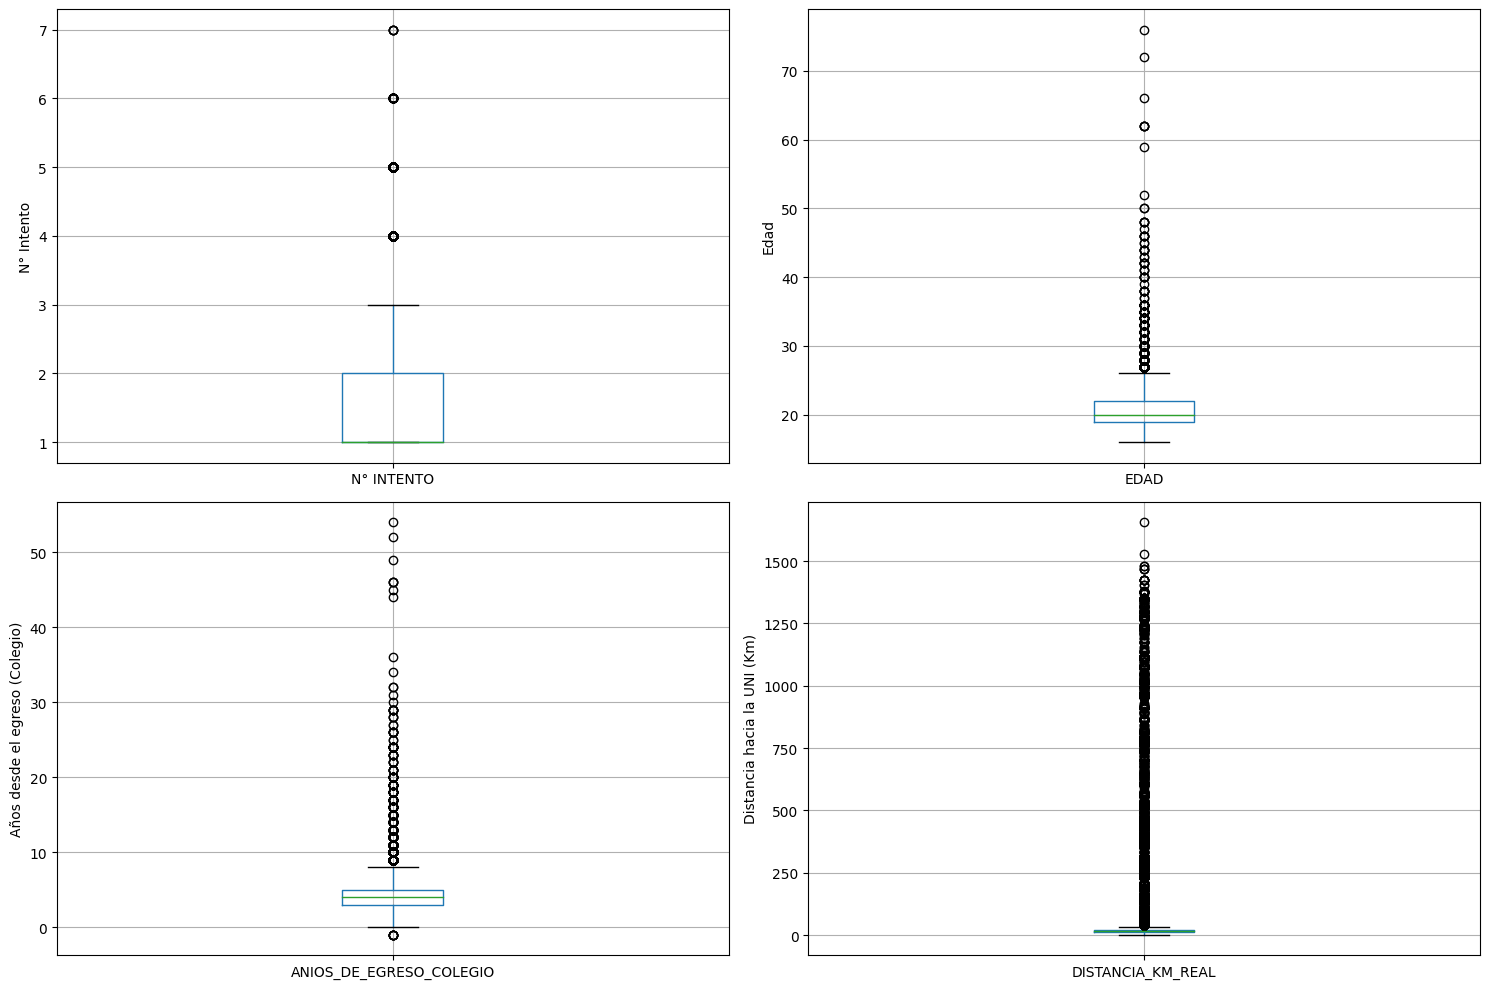

In [39]:
#Graficamos los gráficos de  cajas referentes a las variables con posibles Outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_modelo.boxplot(column='N° INTENTO')
fig.set_title('')
fig.set_ylabel('N° Intento')

plt.subplot(2, 2, 2)
fig = df_modelo.boxplot(column='EDAD')
fig.set_title('')
fig.set_ylabel('Edad')

plt.subplot(2, 2, 3)
fig = df_modelo.boxplot(column='ANIOS_DE_EGRESO_COLEGIO')
fig.set_title('')
fig.set_ylabel('Años desde el egreso (Colegio)')

plt.subplot(2, 2, 4)
fig = df_modelo.boxplot(column='DISTANCIA_KM_REAL')
fig.set_title('')
fig.set_ylabel('Distancia hacia la UNI (Km)')

plt.tight_layout()

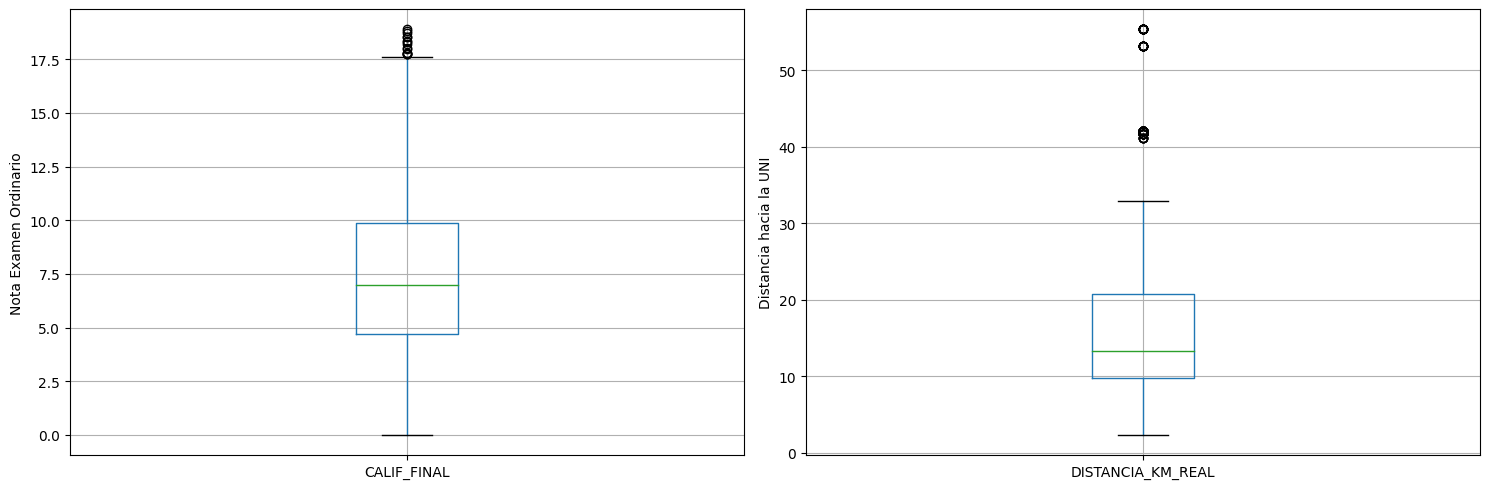

In [40]:
#Ahora vamos a visualizar dos aspetos importante:
#Gráfico de cajas de las notas obtenidas en el Examen UNI - Ordinario
#Gráfico de cajas de la distancia real hacia la UNI, pero solo los que residen en Lima

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
fig = df_modelo.boxplot(column='CALIF_FINAL')
fig.set_title('')
fig.set_ylabel('Nota Examen Ordinario')

plt.subplot(1, 2, 2)
fig = df_modelo[df_modelo['DISTANCIA_KM_REAL'] <= 57].boxplot(column='DISTANCIA_KM_REAL')
fig.set_title('')
fig.set_ylabel('Distancia hacia la UNI')

plt.tight_layout()

In [41]:
#Renombrar la columna de la columna N° INTENTO a N_INTENTO
df_modelo.rename(columns={'N° INTENTO': 'N_INTENTO'}, inplace=True)

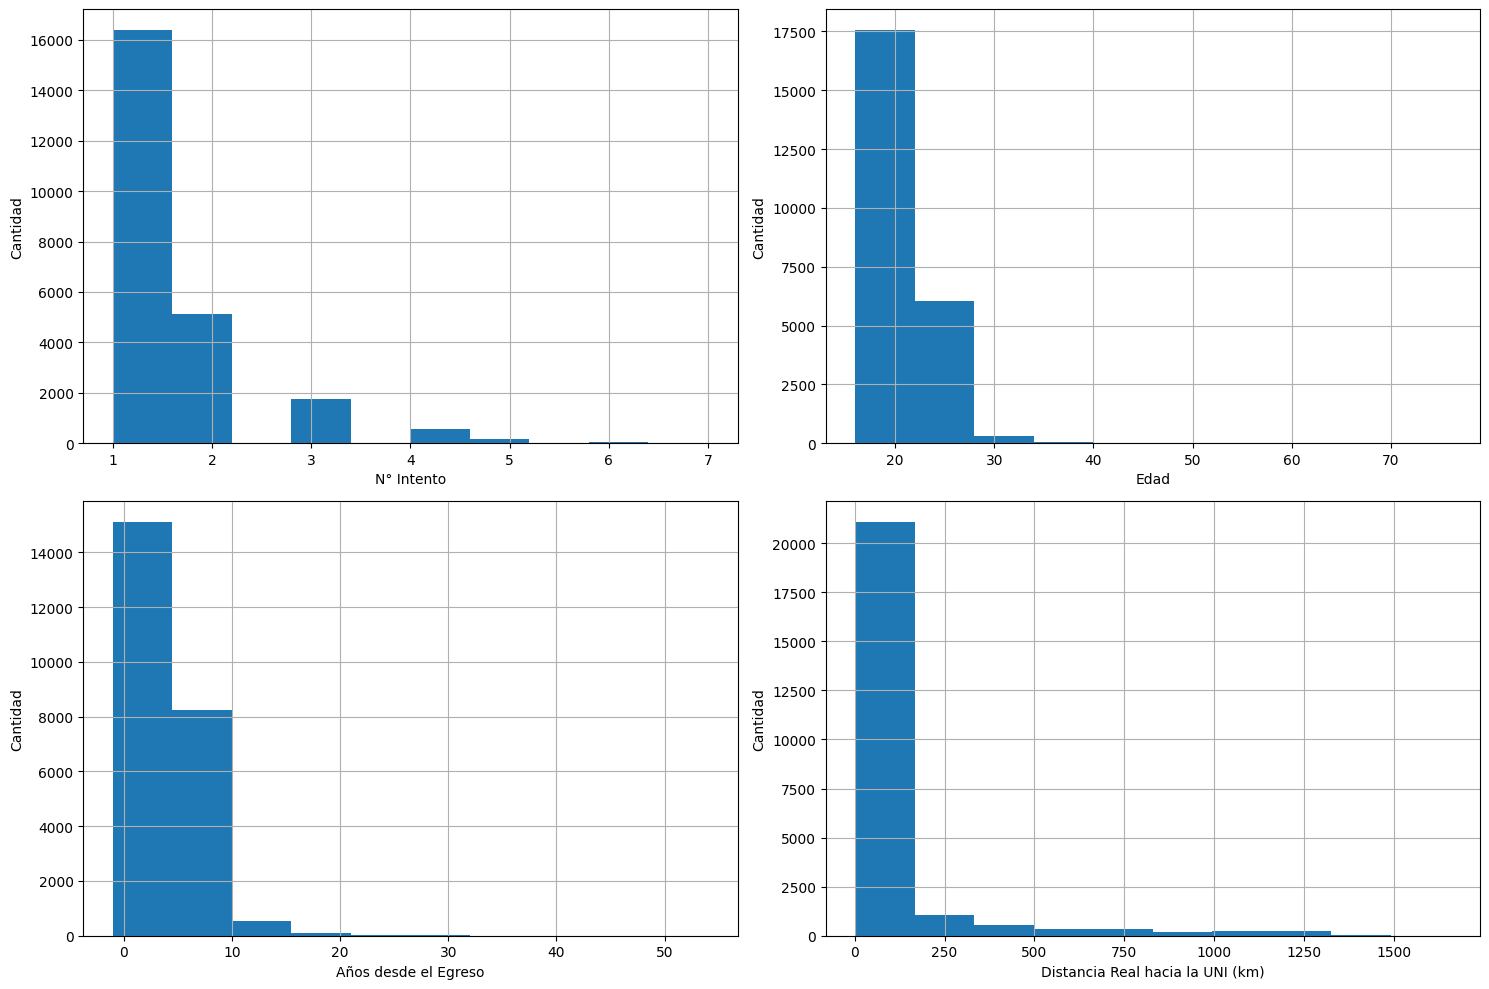

In [42]:

#Visualizamos la distribución con histograma
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_modelo.N_INTENTO.hist(bins=10)
fig.set_xlabel('N° Intento')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 2)
fig = df.EDAD.hist(bins=10)
fig.set_xlabel('Edad')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 3)
fig = df.ANIOS_DE_EGRESO_COLEGIO.hist(bins=10)
fig.set_xlabel('Años desde el Egreso')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 4)
fig = df.DISTANCIA_KM_REAL.hist(bins=10)
fig.set_xlabel('Distancia Real hacia la UNI (km)')
fig.set_ylabel('Cantidad')

plt.tight_layout()

Text(0, 0.5, 'Cantidad')

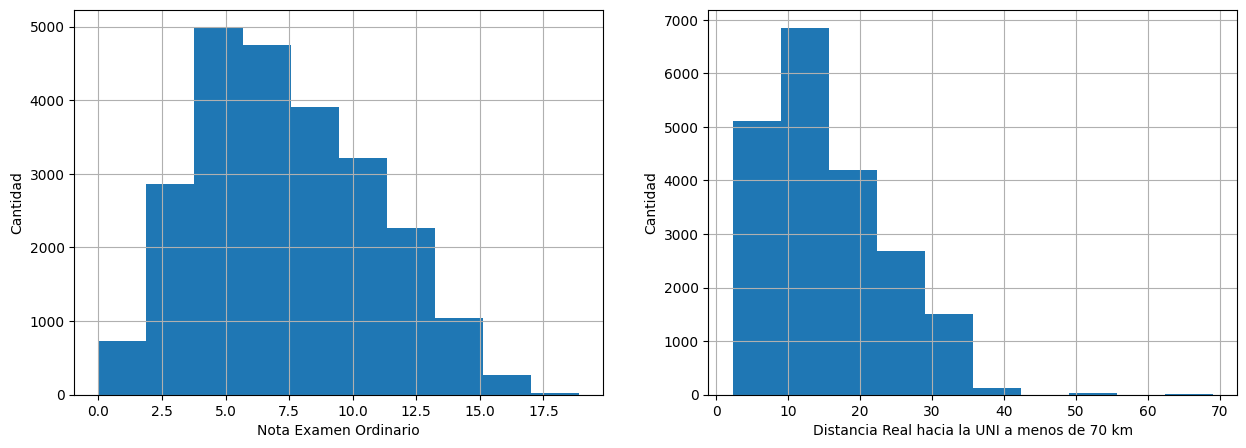

In [43]:
#Nuevamente se verifica la distribución en histograma de la calificación final y Distancia real en un radio de 35 km
#Visualizamos la distribución con histograma
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
fig = df_modelo.CALIF_FINAL.hist(bins=10)
fig.set_xlabel('Nota Examen Ordinario')
fig.set_ylabel('Cantidad')

plt.subplot(1, 2, 2)
fig = df_modelo[df_modelo['DISTANCIA_KM_REAL'] <= 70].DISTANCIA_KM_REAL.hist(bins=10)
fig.set_xlabel('Distancia Real hacia la UNI a menos de 70 km')
fig.set_ylabel('Cantidad')


##Análisis de los Outliers

In [44]:
#Encontramos los outliers de la variable N° INTENTO (3*IQR = Atípico Extremo)

IQR = df_modelo.N_INTENTO.quantile(0.75) - df_modelo.N_INTENTO.quantile(0.25)
Lower_fence = df_modelo.N_INTENTO.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.N_INTENTO.quantile(0.75) + (IQR * 3)
print('Los outliers para N_INTENTO son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para N_INTENTO son < -2.0 or > 5.0


In [45]:
#Encontramos los outliers de la variable EDAD (3*IQR = Atípico Extremo)

IQR = df_modelo.EDAD.quantile(0.75) - df_modelo.EDAD.quantile(0.25)
Lower_fence = df_modelo.EDAD.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.EDAD.quantile(0.75) + (IQR * 3)
print('Los outliers para EDAD son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para EDAD son < 10.0 or > 31.0


In [46]:
#Encontramos los outliers de la variable ANIOS_DE_EGRESO_COLEGIO (3*IQR = Atípico Extremo)

IQR = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.75) - df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.25)
Lower_fence = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.75) + (IQR * 3)
print('Los outliers para ANIOS_DE_EGRESO_COLEGIO son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para ANIOS_DE_EGRESO_COLEGIO son < -3.0 or > 11.0


In [47]:
#Encontramos los outliers de la variable DISTANCIA_KM_REAL (3*IQR = Atípico Extremo)

IQR = df_modelo.DISTANCIA_KM_REAL.quantile(0.75) - df_modelo.DISTANCIA_KM_REAL.quantile(0.25)
Lower_fence = df_modelo.DISTANCIA_KM_REAL.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.DISTANCIA_KM_REAL.quantile(0.75) + (IQR * 3)
print('Los outliers para DISTANCIA_KM_REAL son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para DISTANCIA_KM_REAL son < -22.191999999999997 or > 56.327


##Declaramos cuales son las variables dependientes e independientes

In [48]:
X = df_modelo.drop(['INGRESO'], axis=1)
y = df_modelo['INGRESO']

##Separamos la data en entrenamiento y testeo

In [50]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
X_train.shape, X_test.shape

((19239, 8), (4810, 8))

In [52]:
X_train.dtypes

,0
SEXO,object
CALIF_FINAL,float64
N_INTENTO,int64
EDAD,int64
ANIOS_DE_EGRESO_COLEGIO,int64
DISTANCIA_KM_REAL,float64
DOMICILIO_MACROREGION,object
COLEGIO_UBICACION,object


##Ingeniería de caracteristicas

In [53]:
#Muestra todas las variables del entrenamiento
X_train.dtypes

,0
SEXO,object
CALIF_FINAL,float64
N_INTENTO,int64
EDAD,int64
ANIOS_DE_EGRESO_COLEGIO,int64
DISTANCIA_KM_REAL,float64
DOMICILIO_MACROREGION,object
COLEGIO_UBICACION,object


In [54]:
#Muestra las variables del categorico
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['SEXO', 'DOMICILIO_MACROREGION', 'COLEGIO_UBICACION']

In [55]:
#Muestra las variables de los numéricos
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['CALIF_FINAL',
 'N_INTENTO',
 'EDAD',
 'ANIOS_DE_EGRESO_COLEGIO',
 'DISTANCIA_KM_REAL']

In [56]:
#Checkeo de los valores nulos
X_train.isnull().sum()

,0
SEXO,0
CALIF_FINAL,0
N_INTENTO,0
EDAD,0
ANIOS_DE_EGRESO_COLEGIO,0
DISTANCIA_KM_REAL,0
DOMICILIO_MACROREGION,0
COLEGIO_UBICACION,0


##Codificar las variables numéricas (Outliers)

In [57]:
#Checkeo de los outliers en variables numéricas
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['N_INTENTO'] = max_value(df3, 'N_INTENTO', 5)
    df3['EDAD'] = max_value(df3, 'EDAD', 31)
    df3['ANIOS_DE_EGRESO_COLEGIO'] = max_value(df3, 'ANIOS_DE_EGRESO_COLEGIO', 11)
    df3['DISTANCIA_KM_REAL'] = max_value(df3, 'DISTANCIA_KM_REAL', 56.33)

In [58]:
X_train[numerical].describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,7.376307,1.460315,20.678622,4.281044,20.983618
std,3.447387,0.797629,2.233206,2.052606,16.753658
min,0.000000,1.000000,16.000000,-1.000000,2.292000
25%,4.709500,1.000000,19.000000,3.000000,11.459000
50%,6.991000,1.000000,20.000000,4.000000,17.864000
75%,9.864500,2.000000,22.000000,5.000000,22.676000
max,18.895000,5.000000,31.000000,11.000000,56.330000


##Codificar variables categóricas

In [59]:
X_train[categorical].head()

,SEXO,DOMICILIO_MACROREGION,COLEGIO_UBICACION
10568,MASCULINO,LIMA,LIMA
2133,MASCULINO,LIMA,LIMA
11874,MASCULINO,LIMA,LIMA
9018,MASCULINO,LIMA,LIMA
660,MASCULINO,CENTRO,ANCASH


In [60]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 941.5 kB/s eta 0:00:00


In [61]:
# encode INGRESO variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['SEXO'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [62]:
X_train.head()

,SEXO_0,SEXO_1,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,DOMICILIO_MACROREGION,COLEGIO_UBICACION
10568,0,1,12.190,3,21,4,12.397,LIMA,LIMA
2133,0,1,8.080,1,21,5,12.234,LIMA,LIMA
11874,0,1,13.322,3,21,5,2.752,LIMA,LIMA
9018,0,1,14.400,2,20,4,32.123,LIMA,LIMA
660,0,1,9.320,1,21,5,56.330,CENTRO,ANCASH


In [63]:
X_train = pd.concat([X_train[numerical], X_train[['SEXO_0', 'SEXO_1']],
                     pd.get_dummies(X_train.COLEGIO_UBICACION),
                     pd.get_dummies(X_train.DOMICILIO_MACROREGION)], axis=1)

In [64]:
X_train.head()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,SEXO_0,SEXO_1,AMAZONAS,ANCASH,APURIMAC,...,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,CENTRO,LIMA,NORTE,ORIENTE,SUR
10568,12.190,3,21,4,12.397,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2133,8.080,1,21,5,12.234,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
11874,13.322,3,21,5,2.752,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9018,14.400,2,20,4,32.123,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
660,9.320,1,21,5,56.330,0,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [65]:
#Similar creamos el test set
X_test = pd.concat([X_test[numerical], X_test[['SEXO_0', 'SEXO_1']],
                     pd.get_dummies(X_test.COLEGIO_UBICACION),
                    pd.get_dummies(X_test.DOMICILIO_MACROREGION)], axis=1)

In [66]:
X_test.head()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,SEXO_0,SEXO_1,AMAZONAS,ANCASH,APURIMAC,...,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,CENTRO,LIMA,NORTE,ORIENTE,SUR
16943,7.329,1,21,5,2.752,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3101,5.360,1,20,4,56.330,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22081,11.485,1,18,2,2.752,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
18417,6.981,4,20,4,2.752,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
23433,15.976,1,17,1,32.123,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#ESCALADO DE LAS VARIABLES

In [67]:
X_train.describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,SEXO_0,SEXO_1
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,7.376307,1.460315,20.678622,4.281044,20.983618,0.222049,0.777951
std,3.447387,0.797629,2.233206,2.052606,16.753658,0.415635,0.415635
min,0.000000,1.000000,16.000000,-1.000000,2.292000,0.000000,0.000000
25%,4.709500,1.000000,19.000000,3.000000,11.459000,0.000000,1.000000
50%,6.991000,1.000000,20.000000,4.000000,17.864000,0.000000,1.000000
75%,9.864500,2.000000,22.000000,5.000000,22.676000,0.000000,1.000000
max,18.895000,5.000000,31.000000,11.000000,56.330000,1.000000,1.000000


In [68]:
cols = X_train.columns

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,SEXO_0,SEXO_1,AMAZONAS,ANCASH,APURIMAC,...,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,CENTRO,LIMA,NORTE,ORIENTE,SUR
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,0.390384,0.115079,0.311908,0.440087,0.345898,0.222049,0.777951,0.005510,0.024637,0.009824,...,0.01050,0.005042,0.002651,0.000676,0.002443,0.073497,0.878944,0.017465,0.006653,0.023442
std,0.182450,0.199407,0.148880,0.171051,0.310035,0.415635,0.415635,0.074024,0.155022,0.098630,...,0.10193,0.070829,0.051420,0.025986,0.049367,0.260957,0.326201,0.130998,0.081297,0.151306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249246,0.000000,0.200000,0.333333,0.169640,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.369992,0.000000,0.266667,0.416667,0.288168,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.522069,0.250000,0.400000,0.500000,0.377216,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#REGRESIÓN LOGÍSTICA (ENTRENAMIENTO DE MODELO)

In [71]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#REGRESION LOGÍSTICA (PREDECIR RESULTADOS)

In [72]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [73]:
# probability of getting output as 0 - no ingresar

logreg.predict_proba(X_test)[:,0]

array([0.98843342, 0.99875616, 0.66930474, ..., 0.99935267, 0.99984316,
       0.98742404])

In [74]:
# probability of getting output as 1 - ingresar

logreg.predict_proba(X_test)[:,1]

array([1.15665781e-02, 1.24383614e-03, 3.30695256e-01, ...,
       6.47328442e-04, 1.56840596e-04, 1.25759614e-02])

#REGRESIÓN LOGÍSTICA (MEDICIÓN DE PRECISIÓN)

In [75]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9403


In [76]:
#Comparar
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['SI', 'NO', 'SI', ..., 'NO', 'NO', 'NO'], dtype=object)

In [77]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9398


In [78]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9398
Test set score: 0.9403


In [79]:
####### C = 100
#Incrementando el valor de C, volvemos más flexible el modelo

# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [80]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9392
Test set score: 0.9426


In [81]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [82]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8699
Test set score: 0.8672


In [83]:
### NULL ACCURACY
# check class distribution in test set

y_test.value_counts()

,count
INGRESO,
NO,4165
SI,645


In [84]:
# check null accuracy score

null_accuracy = (4165/(4165+645))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8659


## MATRIZ DE CONFUSION

In [85]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4077   88]
 [ 199  446]]

True Positives(TP) =  4077

True Negatives(TN) =  446

False Positives(FP) =  88

False Negatives(FN) =  199


<Axes: >

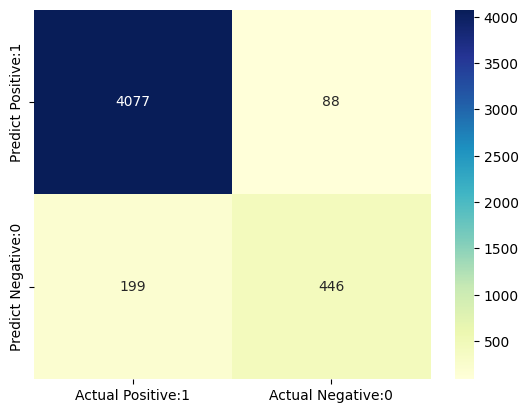

In [86]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#METRICAS DE CLASIFICACION

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          NO       0.95      0.98      0.97      4165
          SI       0.84      0.69      0.76       645

    accuracy                           0.94      4810
   macro avg       0.89      0.84      0.86      4810
weighted avg       0.94      0.94      0.94      4810



In [88]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [89]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9403


In [90]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0597


In [91]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9789


In [92]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9535


In [93]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9535


In [94]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1648


In [95]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8352


#Ajustar el nivel de umbral

In [96]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.88433422e-01, 1.15665781e-02],
       [9.98756164e-01, 1.24383614e-03],
       [6.69304744e-01, 3.30695256e-01],
       [9.91810142e-01, 8.18985758e-03],
       [3.16611868e-02, 9.68338813e-01],
       [9.88343571e-01, 1.16564287e-02],
       [8.82199065e-01, 1.17800935e-01],
       [8.38324219e-01, 1.61675781e-01],
       [8.94000307e-01, 1.05999693e-01],
       [9.99014333e-01, 9.85666733e-04]])

In [97]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Ingresar (0)', 'Prob of - Ingresar (1)'])

y_pred_prob_df

,Prob of - No Ingresar (0),Prob of - Ingresar (1)
0,0.988433,0.011567
1,0.998756,0.001244
2,0.669305,0.330695
3,0.991810,0.008190
4,0.031661,0.968339
5,0.988344,0.011656
6,0.882199,0.117801
7,0.838324,0.161676
8,0.894000,0.106000
9,0.999014,0.000986


In [98]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.01156658, 0.00124384, 0.33069526, 0.00818986, 0.96833881,
       0.01165643, 0.11780093, 0.16167578, 0.10599969, 0.00098567])

In [99]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

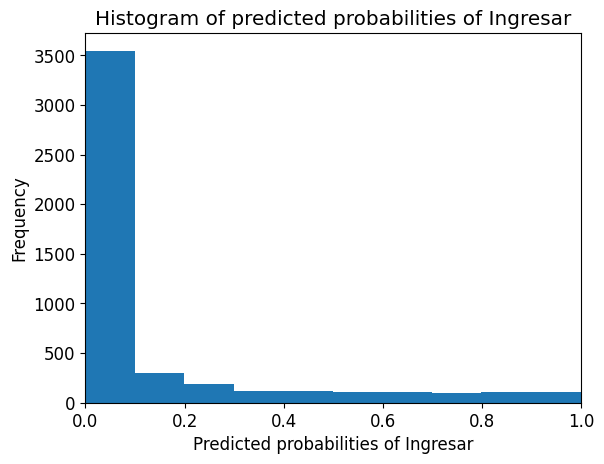

In [101]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Ingresar')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Ingresar')
plt.ylabel('Frequency')

In [102]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold = i/10)

    y_pred2 = np.where(y_pred2 == 1, 'SI', 'NO')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[3521  644]
 [  27  618]] 

 with 4139 correct predictions,  

 644 Type I errors( False Positives),  

 27 Type II errors( False Negatives),  

 Accuracy score:  0.8604989604989605 

 Sensitivity:  0.958139534883721 

 Specificity:  0.8453781512605042 



With 0.2 threshold the Confusion Matrix is  

 [[3776  389]
 [  74  571]] 

 with 4347 correct predictions,  

 389 Type I errors( False Positives),  

 74 Type II errors( False Negatives),  

 Accuracy score:  0.9037422037422037 

 Sensitivity:  0.8852713178294573 

 Specificity:  0.9066026410564225 



With 0.3 threshold the Confusion Matrix is  

 [[3932  233]
 [ 105  540]] 

 with 4472 correct predictions,  

 233 Type I errors( False Positives),  

 105 Type II errors( False Negatives),  

 Accuracy score:  0.9297297297297298 

 Sensitivity:  0.8372093023255814 

 Specificity:  0.9440576230492197 



With 0.4 threshold the Confusion Matrix is  

 [[4020  145]
 [ 141  504]] 

 with 

#ROC - AUC

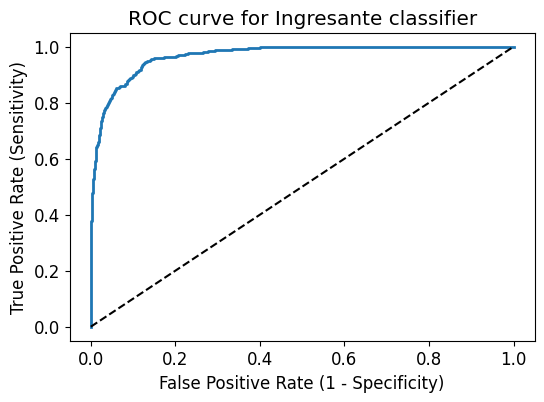

In [103]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'SI')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Ingresante classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [104]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9689


In [105]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9666


In [106]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93840956 0.93892931 0.93866944 0.93451143 0.94125292]


In [107]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9384


#Optimización - Barrido de Hiperparámetros

In [108]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [109]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9385


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [110]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9418


#Prueba Final

In [130]:
X_train.describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DISTANCIA_KM_REAL,SEXO_0,SEXO_1,AMAZONAS,ANCASH,APURIMAC,...,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,CENTRO,LIMA,NORTE,ORIENTE,SUR
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,0.390384,0.115079,0.311908,0.440087,0.345898,0.222049,0.777951,0.005510,0.024637,0.009824,...,0.01050,0.005042,0.002651,0.000676,0.002443,0.073497,0.878944,0.017465,0.006653,0.023442
std,0.182450,0.199407,0.148880,0.171051,0.310035,0.415635,0.415635,0.074024,0.155022,0.098630,...,0.10193,0.070829,0.051420,0.025986,0.049367,0.260957,0.326201,0.130998,0.081297,0.151306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249246,0.000000,0.200000,0.333333,0.169640,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.369992,0.000000,0.266667,0.416667,0.288168,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.522069,0.250000,0.400000,0.500000,0.377216,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
#X_train
#X_test
#y_train
#y_test

#Vamos a convertir tanto el y_train y y_test. Los valores "NO" serán 0, y los valores "SI" serán 1
y_train_1 = np.where(y_train == 'SI', 1, 0)

#Vamos a convertir todos los valores de X_train y X_test en tipos float
y_train_1 = pd.to_numeric(y_train_1, errors='coerce')


In [146]:
import statsmodels.api as sm

# Añadir una constante (intercepto) a las variables independientes
X_train_sm = sm.add_constant(X_train)

# Verificar tipos de datos y convertir si es necesario
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos si existen
X_train_sm = X_train_sm.dropna()

# Ajustar el modelo usando statsmodels
model = sm.Logit(y_train_1, X_train_sm)
result = model.fit()
# Revisar los tipos de datos

print(result.summary())

#Nótese que, si bien el modelo es bueno, la variable DISTRITO_COLEGIO se vuelve irrelevante dado que la distancia hacia la UNI trunca el análisis a Lima

         Current function value: 0.147968
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19239
Model:                          Logit   Df Residuals:                    19203
Method:                           MLE   Df Model:                           35
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.6185
Time:                        05:23:19   Log-Likelihood:                -2846.8
converged:                      False   LL-Null:                       -7462.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -9.4192   7.58e+06  -1.24e-06      1.000   -1.48e+07    1.48e+07
('CALIF_FINAL',)                21.7444      0.445     48.838      0.000     

In [ ]:
df_modelo.groupby([''])

#FIN - Adicional: Prueba inicial con variables simples y sin limpieza

In [71]:
# Importar las librerías necesarias
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las variables dependiente e independiente
X = df_modelo.drop('INGRESO', axis=1)  # Todas las variables excepto INGRESO
y = df_modelo['INGRESO']  # Variable dependiente

# Convertir todas las columnas de X e y a numérico para evitar errores de tipo
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Eliminar filas con valores faltantes tanto en X como en y
X = X.dropna()
y = y.loc[X.index]  # Asegúrate de que y tenga los mismos índices que X

# Revisar los tipos de datos
print("Tipos de datos en X:\n", X.dtypes)
print("\nTipos de datos en y:\n", y.dtypes)

# Asegurarse de que todos los tipos son numéricos antes de proceder
X = X.astype(float)
y = y.astype(float)

# Añadir una constante para el término independiente en el modelo
X = sm.add_constant(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística usando statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Imprimir el resumen del modelo que incluye los coeficientes y sus significancias
print(result.summary())

Tipos de datos en X:
 ANIO_POSTULA                        int64
SEXO                                int64
CALIF_FINAL                       float64
N° INTENTO                          int64
EDAD                                int64
ANIOS_DE_EGRESO_COLEGIO             int64
DISTANCIA_KM_REAL                 float64
MACROREGION_Lima Metropolitana       bool
MACROREGION_Norte                    bool
MACROREGION_Oriente                  bool
MACROREGION_Sur                      bool
dtype: object

Tipos de datos en y:
 int64
Optimization terminated successfully.
         Current function value: 0.146247
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                INGRESO   No. Observations:                19239
Model:                          Logit   Df Residuals:                    19227
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Aug 2024   Pseudo R-squ.: